In [142]:
import pandas as pd
import numpy as np
import random

In [143]:
df=pd.read_csv('Dry_Bean_Dataset.csv')
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [144]:

# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df['Class']= label_encoder.fit_transform(df['Class']) 
  
df['Class'].unique() 

array([5, 0, 1, 2, 4, 6, 3])

In [145]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [146]:
y

0        5
1        5
2        5
3        5
4        5
        ..
13606    3
13607    3
13608    3
13609    3
13610    3
Name: Class, Length: 13611, dtype: int32

In [147]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [148]:
new_df=pd.concat([X_train,y_train],axis=1)

In [149]:
new_df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
10704,27490,618.868,233.001523,151.202562,1.540989,0.760845,27753,187.086491,0.731117,0.990524,0.901963,0.802941,0.008476,0.002173,0.644714,0.993498,3
13145,37946,738.476,264.960115,182.588263,1.451134,0.724651,38540,219.805250,0.759224,0.984587,0.874386,0.829579,0.006983,0.002040,0.688201,0.998672,3
2571,67686,1044.470,368.601069,234.202503,1.573856,0.772198,69063,293.565141,0.708383,0.980062,0.779681,0.796431,0.005446,0.001352,0.634302,0.998299,0
4683,74759,1058.713,405.850888,238.557776,1.701269,0.809009,76604,308.522471,0.751037,0.975915,0.838141,0.760187,0.005429,0.001118,0.577884,0.983136,2
12624,35110,693.189,254.183543,176.478601,1.440308,0.719690,35528,211.431881,0.765925,0.988235,0.918200,0.831808,0.007240,0.002138,0.691904,0.996555,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,37832,720.476,263.034496,183.384981,1.434330,0.716887,38289,219.474824,0.725168,0.988064,0.915862,0.834396,0.006953,0.002079,0.696216,0.998603,3
3264,85890,1152.016,417.536420,262.719645,1.589285,0.777232,87188,330.694035,0.714654,0.985113,0.813271,0.792012,0.004861,0.001180,0.627284,0.996933,0
9845,51131,842.796,316.185621,207.028992,1.527253,0.755828,51654,255.150958,0.812506,0.989875,0.904585,0.806966,0.006184,0.001618,0.651194,0.994537,6
10799,27884,630.303,239.405409,148.484842,1.612322,0.784425,28196,188.422428,0.758253,0.988935,0.881995,0.787043,0.008586,0.002032,0.619437,0.998732,3


In [150]:
s0 = new_df.sample(n = 900) 
s1 = new_df.sample(n = 900) 
s2 = new_df.sample(n = 900) 
s3 = new_df.sample(n = 900) 
s4 = new_df.sample(n = 900) 
s5 = new_df.sample(n = 900) 
s6 = new_df.sample(n = 900) 
s7 = new_df.sample(n = 900) 
s8 = new_df.sample(n = 900) 
s9 = new_df.sample(n = 900) 

In [151]:
s0_train = s0.iloc[:, :-1]
s0_test = s0.iloc[:, -1]

s1_train = s1.iloc[:, :-1]
s1_test = s1.iloc[:, -1]

s2_train = s2.iloc[:, :-1]
s2_test = s2.iloc[:, -1]

s3_train = s3.iloc[:, :-1]
s3_test = s3.iloc[:, -1]

s4_train = s4.iloc[:, :-1]
s4_test = s4.iloc[:, -1]

s5_train = s5.iloc[:, :-1]
s5_test = s5.iloc[:, -1]

s6_train = s6.iloc[:, :-1]
s6_test = s6.iloc[:, -1]

s7_train = s7.iloc[:, :-1]
s7_test = s7.iloc[:, -1]

s8_train = s8.iloc[:, :-1]
s8_test = s8.iloc[:, -1]

s9_train = s9.iloc[:, :-1]
s9_test = s9.iloc[:, -1]



In [152]:
s1_test

4251     2
3261     0
9996     6
1519     5
9781     6
        ..
4913     2
8333     6
13079    3
365      5
4355     2
Name: Class, Length: 900, dtype: int32

In [153]:
from sklearn.svm import NuSVC
classifier = NuSVC(random_state=1)

In [160]:
param_dist = {"kernel": ["linear","poly","rbf"], 
    "nu": [0.1,0.2,0.3]
}
random_search = RandomizedSearchCV(classifier,param_distributions=param_dist,n_iter=100,scoring='accuracy',random_state=1)
random_search.fit(s1_train, s1_test)
score1=random_search.best_score_
params1=random_search.best_params_
print('Best Score for s1: %s' % score1)
print('Best Hyperparameters: %s' % params1) 

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **

Best Score for s1: 0.8977777777777778
Best Hyperparameters: {'nu': 0.2, 'kernel': 'linear'}


In [161]:
random_search = RandomizedSearchCV(classifier,param_distributions=param_dist,n_iter=100,scoring='accuracy',random_state=1)
random_search.fit(s2_train, s2_test)
score2=random_search.best_score_
params2=random_search.best_params_
print('Best Score for s2: %s' % score2)
print('Best Hyperparameters: %s' % params2) 

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **

Best Score for s2: 0.8722222222222223
Best Hyperparameters: {'nu': 0.2, 'kernel': 'linear'}


In [162]:
random_search = RandomizedSearchCV(classifier,param_distributions=param_dist,n_iter=100,scoring='accuracy',random_state=1)
random_search.fit(s3_train, s3_test)
score3=random_search.best_score_
params3=random_search.best_params_
print('Best Score for s3: %s' % score3)
print('Best Hyperparameters: %s' % params3) 

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **

Best Score for s3: 0.8122222222222222
Best Hyperparameters: {'nu': 0.2, 'kernel': 'linear'}


In [163]:

random_search = RandomizedSearchCV(classifier,param_distributions=param_dist,n_iter=100,scoring='accuracy',random_state=1)
random_search.fit(s4_train, s4_test)
score4=random_search.best_score_
params4=random_search.best_params_
print('Best Score for s4: %s' % score4)
print('Best Hyperparameters: %s' % params4) 

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Score for s4: 0.8788888888888888
Best Hyperparameters: {'nu': 0.3, 'kernel': 'linear'}


In [164]:

random_search = RandomizedSearchCV(classifier,param_distributions=param_dist,n_iter=100,scoring='accuracy',random_state=1)
random_search.fit(s5_train, s5_test)
score5=random_search.best_score_
params5=random_search.best_params_
print('Best Score for s5: %s' % score5)
print('Best Hyperparameters: %s' % params5) 

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **

Best Score for s5: 0.8677777777777778
Best Hyperparameters: {'nu': 0.2, 'kernel': 'linear'}


In [165]:

random_search = RandomizedSearchCV(classifier,param_distributions=param_dist,n_iter=100,scoring='accuracy',random_state=1)
random_search.fit(s6_train, s6_test)
score6=random_search.best_score_
params6=random_search.best_params_
print('Best Score for s6: %s' % score6)
print('Best Hyperparameters: %s' % params6) 

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **

Best Score for s6: 0.8544444444444445
Best Hyperparameters: {'nu': 0.2, 'kernel': 'linear'}


In [166]:

random_search = RandomizedSearchCV(classifier,param_distributions=param_dist,n_iter=100,scoring='accuracy',random_state=1)
random_search.fit(s7_train, s7_test)
score7=random_search.best_score_
params7=random_search.best_params_
print('Best Score for s7: %s' % score7)
print('Best Hyperparameters: %s' % params7) 

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **

Best Score for s7: 0.8922222222222222
Best Hyperparameters: {'nu': 0.2, 'kernel': 'linear'}


In [167]:

random_search = RandomizedSearchCV(classifier,param_distributions=param_dist,n_iter=100,scoring='accuracy',random_state=1)
random_search.fit(s8_train, s8_test)
score8=random_search.best_score_
params8=random_search.best_params_
print('Best Score for s8: %s' % score8)
print('Best Hyperparameters: %s' % params8) 

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Score for s8: 0.8877777777777778
Best Hyperparameters: {'nu': 0.2, 'kernel': 'linear'}


In [168]:

random_search = RandomizedSearchCV(classifier,param_distributions=param_dist,n_iter=100,scoring='accuracy',random_state=1)
random_search.fit(s9_train, s9_test)
score9=random_search.best_score_
params9=random_search.best_params_
print('Best Score for s9: %s' % score9)
print('Best Hyperparameters: %s' % params9) 

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Score for s9: 0.888888888888889
Best Hyperparameters: {'nu': 0.2, 'kernel': 'linear'}


In [169]:

random_search = RandomizedSearchCV(classifier,param_distributions=param_dist,n_iter=100,scoring='accuracy',random_state=1)
random_search.fit(s0_train, s0_test)
score0=random_search.best_score_
params0=random_search.best_params_
print('Best Score for s0: %s' % score0)
print('Best Hyperparameters: %s' % params0) 

c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **

Best Score for s0: 0.8144444444444444
Best Hyperparameters: {'nu': 0.2, 'kernel': 'linear'}


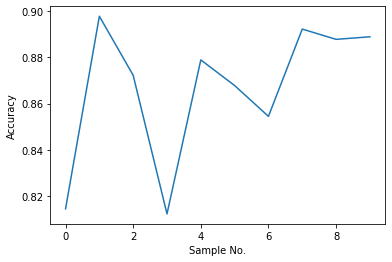

In [173]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([0,1,2,3,4,5,6,7,8,9])
ypoints = np.array([score0,score1,score2,score3,score4,score5,score6,score7,score8,score9])
plt.ylabel('Accuracy') 
plt.xlabel('Sample No.') 
# plt.title('xlabels() function') 
plt.plot(xpoints, ypoints)
plt.show()